## Cities on Volcanoes 2018
### Code of the analysis and processing of seismic data of the work entitled "_The 2015 hurricane-induced lahars at Volcán de Colima, México: seismic characterization and numeric modeling_".

In [1]:
using PyPlot
using ExcelReaders
using SAC
using DSP

In [2]:
pa = SAC.read("Patricia250.sac");

INFO: Data are little-endian; byteswapping


In [3]:
#Conversion to physical units. V(m/s)= count*1.164153nV/22.8V/(m/s)
pa.t = pa.t*0.000000000051059342;

In [4]:
#Time vector
ti = collect(0:pa.npts-1)*pa.delta;
n = convert(Int32,floor(pa.npts/2)+1);
tp = (DateTime(2015,10,23,21,0,0,1):(Dates.Millisecond(1))*4:DateTime(2015,10,24,4,0,0));

In [5]:
#Frequency vector
ds = 1/(pa.delta*pa.npts);
f = collect(0:pa.npts-1)*ds;

In [6]:
rmean!(pa);
rtrend!(pa);

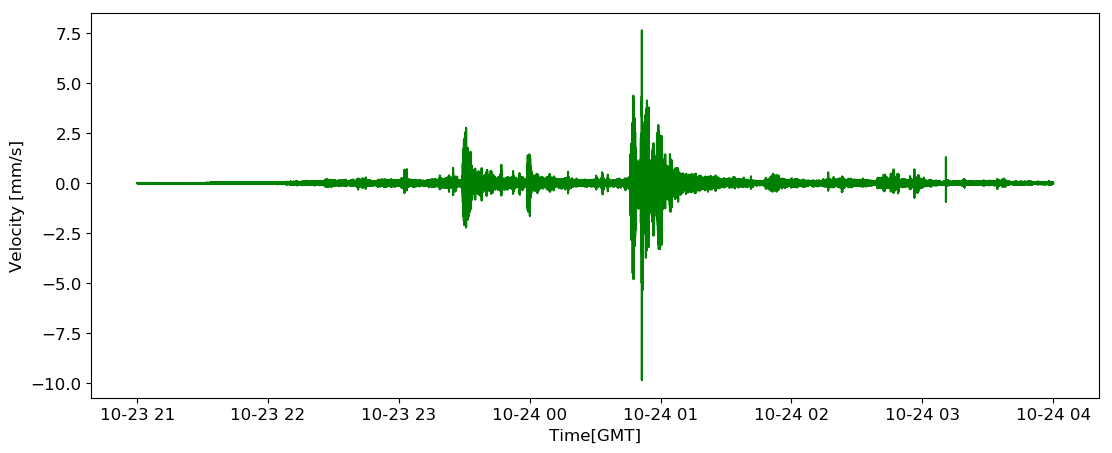

PyObject Text(25,0.5,'Velocity [mm/s]')

In [21]:
fig = figure(figsize=(13,5))
plot(tp,pa.t*1000,"g")
xlabel("Time[GMT]", fontsize=12)
xticks(fontsize=12)
yticks(fontsize=12)
ylabel("Velocity [mm/s]", fontsize=12)
#PyPlot.savefig("time.png",dpi=400)

In [22]:
env = abs.(hilbert(pa.t));

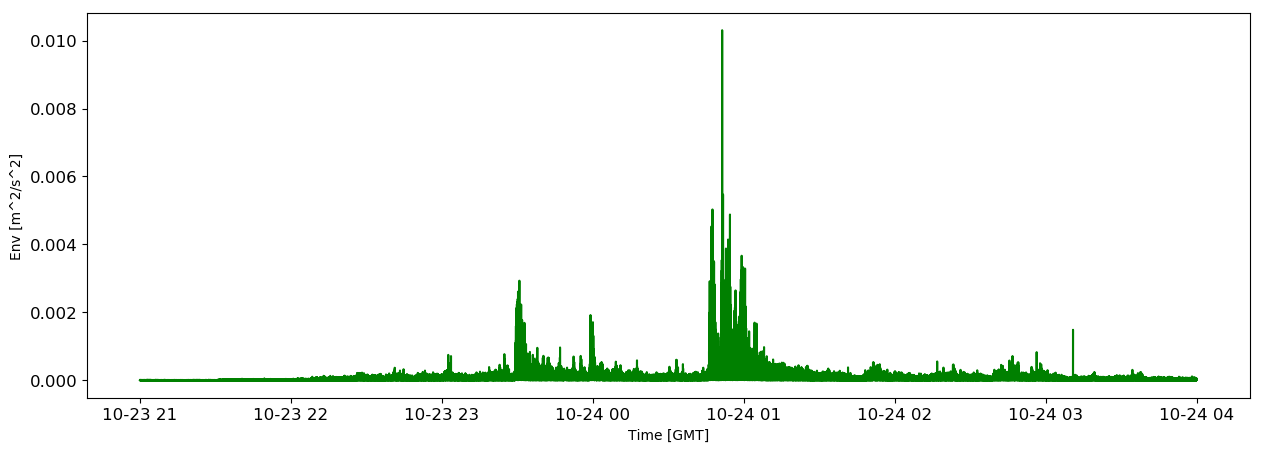

([-0.002, 0.0, 0.002, 0.004, 0.006, 0.008, 0.01, 0.012], PyCall.PyObject[PyObject Text(0,-0.002,'−0.002'), PyObject Text(0,0,'0.000'), PyObject Text(0,0.002,'0.002'), PyObject Text(0,0.004,'0.004'), PyObject Text(0,0.006,'0.006'), PyObject Text(0,0.008,'0.008'), PyObject Text(0,0.01,'0.010'), PyObject Text(0,0.012,'0.012')])

In [13]:
fig = figure(figsize=(15,5))
plot(tp, env,"g")
xlabel("Time [GMT]")
xticks(fontsize=12)
ylabel("Env [m^2/s^2]")
yticks(fontsize=12)

In [23]:
#Movil average function
function MA(x,n)
    if size(x,1)==1
        x = x'
    end
    y = zeros(length(x))
    sx = size(x,2)
    tape = NaN*(zeros(convert(Int,floor(n/2)),sx))
    x1 = [tape;x;tape]
    n1 = n-1
    for ii=1:size(y,1)
        sel = x1[ii+(0:n1),:]
        y[ii]=mean(sel[!isnan.(sel)]);
    end
    return y
end

MA (generic function with 1 method)

In [24]:
e_av = MA(env,400);

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] !(::BitArray{2}) at ./deprecated.jl:57
 [3] MA(::Array{Float32,1}, ::Int64) at ./In[23]:13
 [4] include_string(::String, ::String) at ./loading.jl:522
 [5] include_string(::Module, ::String, ::String) at /home/marv/.julia/v0.6/Compat/src/Compat.jl:71
 [6] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/marv/.julia/v0.6/IJulia/src/execute_request.jl:158
 [7] (::Compat.#inner#17{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /home/marv/.julia/v0.6/Compat/src/Compat.jl:385
 [8] eventloop(::ZMQ.Socket) at /home/marv/.julia/v0.6/IJulia/src/eventloop.jl:8
 [9] (::IJulia.##14#17)() at ./task.jl:335
while loading In[24], in expression starting on line 1


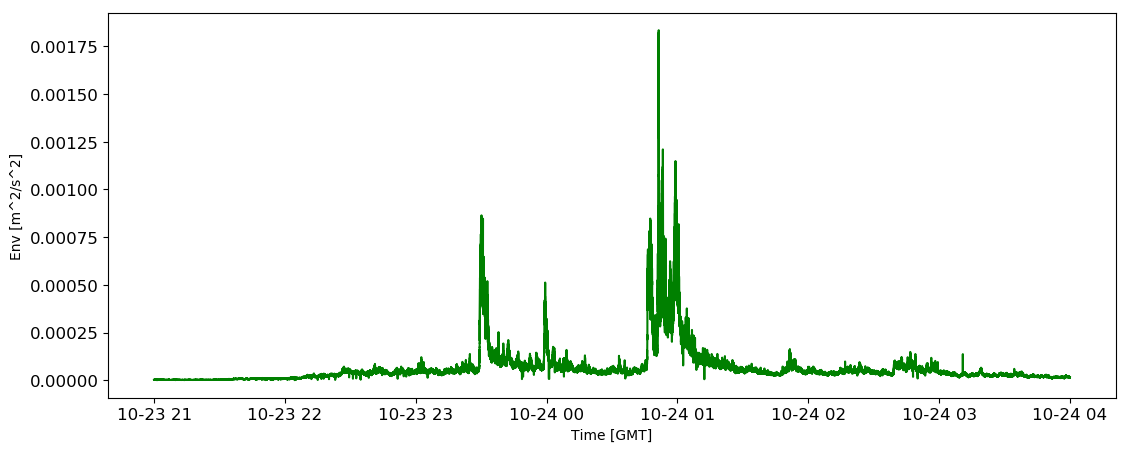

([-0.00025, 0.0, 0.00025, 0.0005, 0.00075, 0.001, 0.00125, 0.0015, 0.00175, 0.002], PyCall.PyObject[PyObject Text(0,-0.00025,'−0.00025'), PyObject Text(0,0,'0.00000'), PyObject Text(0,0.00025,'0.00025'), PyObject Text(0,0.0005,'0.00050'), PyObject Text(0,0.00075,'0.00075'), PyObject Text(0,0.001,'0.00100'), PyObject Text(0,0.00125,'0.00125'), PyObject Text(0,0.0015,'0.00150'), PyObject Text(0,0.00175,'0.00175'), PyObject Text(0,0.002,'0.00200')])

In [25]:
fig = figure(figsize=(13,5))
plot(tp, e_av,"g")
xlabel("Time [GMT]")
xticks(fontsize=12)
ylabel("Env [m^2/s^2]")
yticks(fontsize=12)

In [12]:
#Butterworth filter
resp = Bandpass(6,124,fs=250)
desig = Butterworth(4)
fil = filt(digitalfilter(resp,desig),pa.t);

In [13]:
specf = welch_pgram(fil,fs=250);

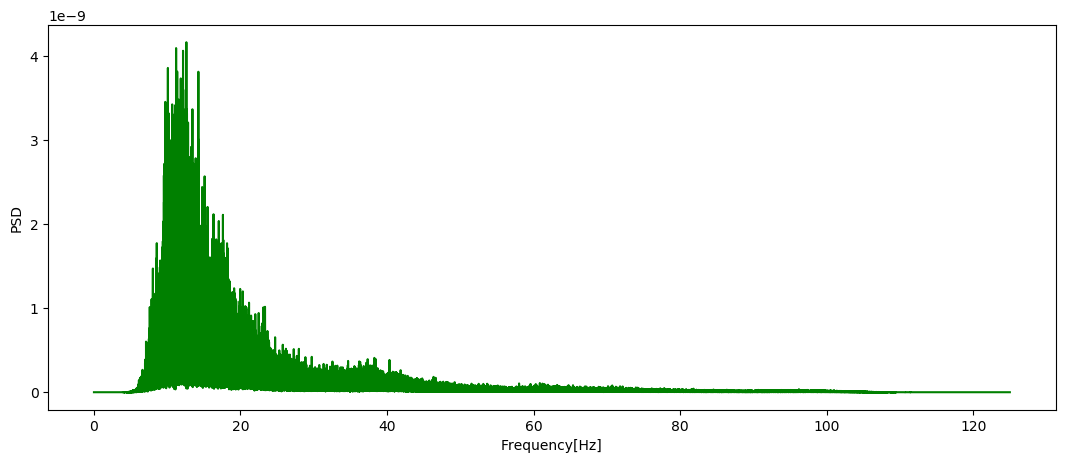

PyObject Text(24,0.5,'PSD')

In [14]:
fig = figure(figsize=(13,5))
plot(specf.freq,specf.power,"g")
xlabel("Frequency[Hz]")
ylabel("PSD")

In [15]:
av_spec = MA(specf.power,400);

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] !(::BitArray{2}) at ./deprecated.jl:57
 [3] MA(::Array{Float64,1}, ::Int64) at ./In[7]:13
 [4] include_string(::String, ::String) at ./loading.jl:522
 [5] include_string(::Module, ::String, ::String) at /home/marv/.julia/v0.6/Compat/src/Compat.jl:71
 [6] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/marv/.julia/v0.6/IJulia/src/execute_request.jl:158
 [7] (::Compat.#inner#17{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /home/marv/.julia/v0.6/Compat/src/Compat.jl:385
 [8] eventloop(::ZMQ.Socket) at /home/marv/.julia/v0.6/IJulia/src/eventloop.jl:8
 [9] (::IJulia.##14#17)() at ./task.jl:335
while loading In[15], in expression starting on line 1


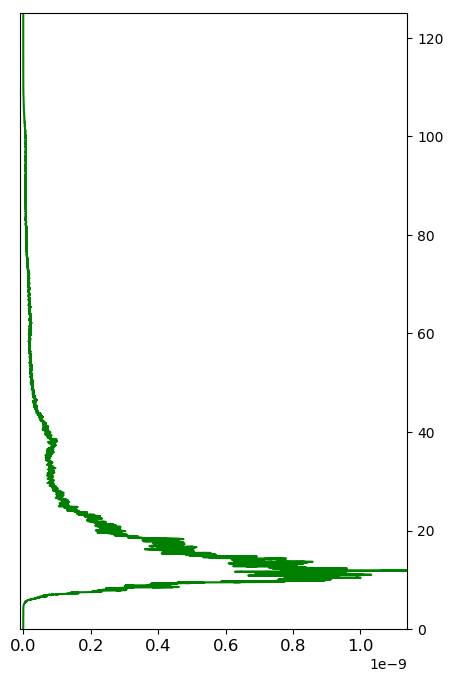

(0.0, 125.0)

In [17]:
fig = figure(figsize=(5,8))
plot(av_spec,specf.freq,"g")
xticks(fontsize=12)
yticks(fontsize=12)
axis("tight")
ax=gca()
ax[:yaxis][:set_ticks_position]("right")
xlim(minimum(av_spec)-0.01e-9,maximum(av_spec))
ylim(minimum(specf.freq),maximum(specf.freq))
#PyPlot.savefig("psd_covs.png",dpi=400)

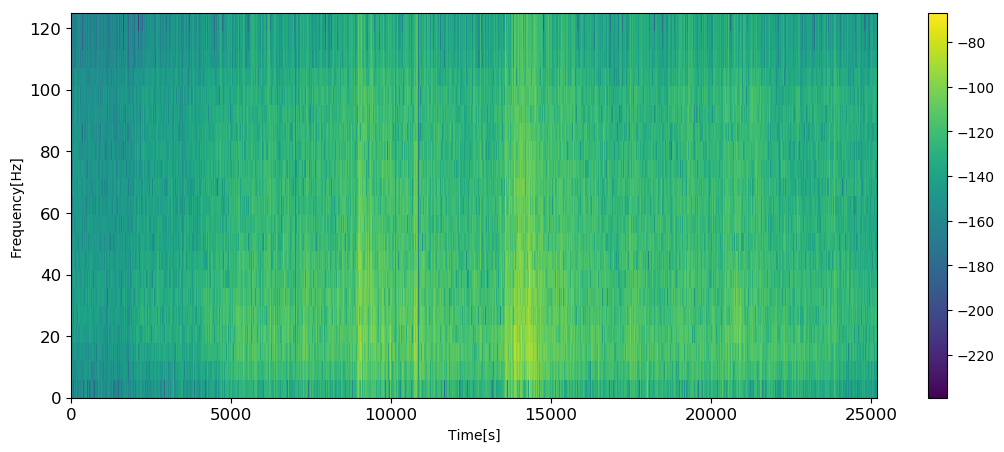

PyObject <matplotlib.colorbar.Colorbar object at 0x7f7f533df4e0>

In [19]:
fig = figure(figsize=(13,5))
specgram(pa.t,125,250,pad_to=40,noverlap=50);
xlabel("Time[s]")
xticks(fontsize=12)
ylabel("Frequency[Hz]")
yticks(fontsize=12)
colorbar()